In [1]:
from mutinfo.distributions.base import CorrelatedNormal, CorrelatedStudent, CorrelatedUniform, GammaExponential, SmoothedUniform, UniformlyQuantized
from mutinfo.distributions.tools import mapped_multi_rv_frozen
from mutinfo.distributions.images.geometric import uniform_to_rectangle, draw_rectangle
from mutinfo.distributions.images.field import draw_field, symmetric_gaussian_field

import numpy as np
import matplotlib.pyplot as plt

In [2]:
MI_grid = np.linspace(0.0, 10.0, 11)
n_samples = 1000
n_runs = 10

image_shape = (16, 16)

(1, 16, 16)


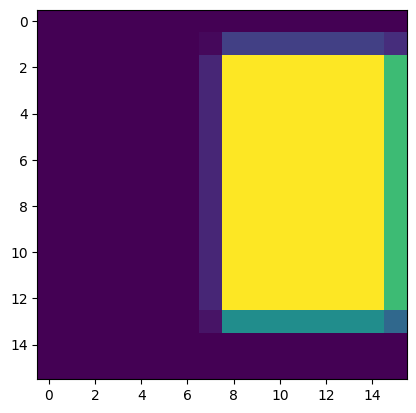

In [3]:
from scipy.stats import norm, uniform, expon

random_variable = mapped_multi_rv_frozen(
    UniformlyQuantized(1.0, 4, uniform(0,1)),
    lambda x, y: (
        draw_rectangle(uniform_to_rectangle(x, min_size=(0.2, 0.2)), image_shape),
        draw_rectangle(uniform_to_rectangle(y, min_size=(0.2, 0.2)), image_shape)
    )
)
x, y = random_variable.rvs(1)

plt.imshow(x[0])
print(x.shape)

In [4]:
from minde.models.unet import UNet

model = UNet(sample_size=16, in_channels=2, out_channels=2, latent_dim=16)